# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 100)

## Step 1: Read in Data

In [2]:
df = pd.read_csv('kc_house_data_train.csv')
df = df.drop(['Unnamed: 0','id'],axis = 1)

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

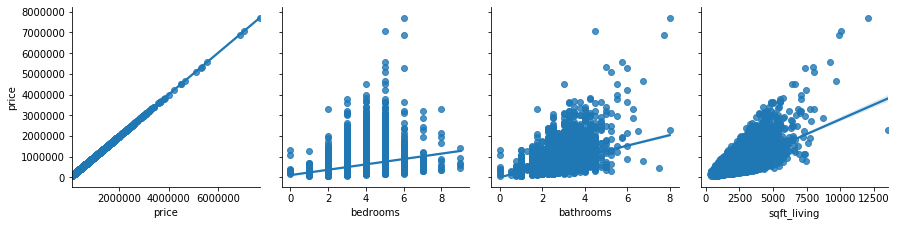

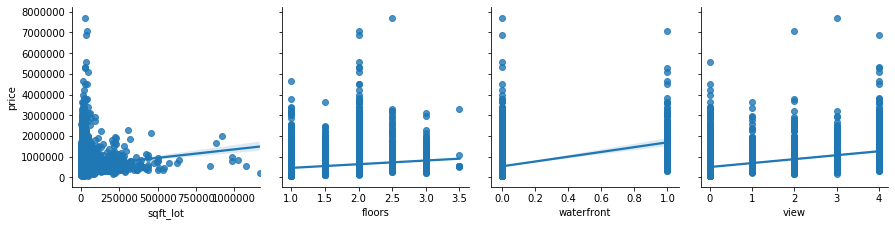

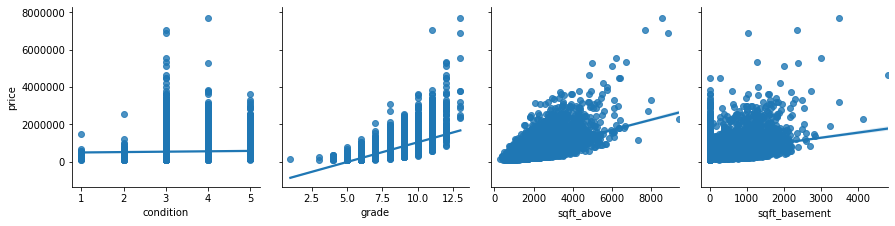

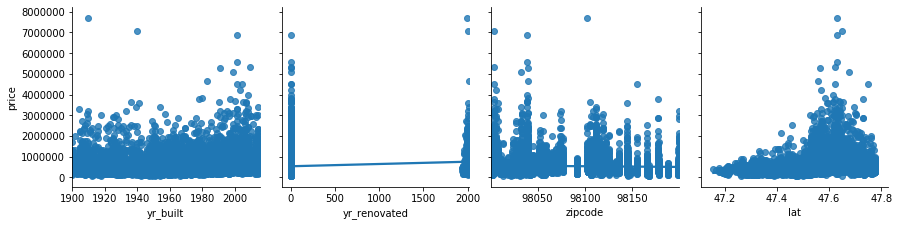

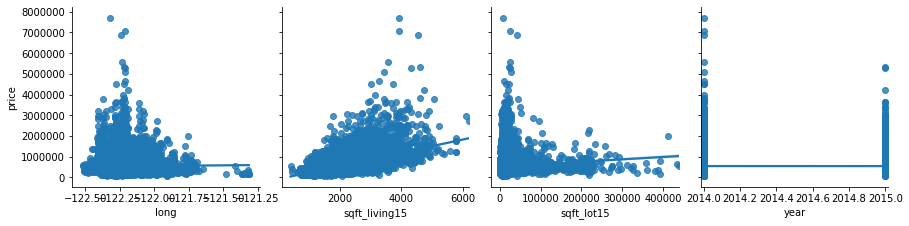

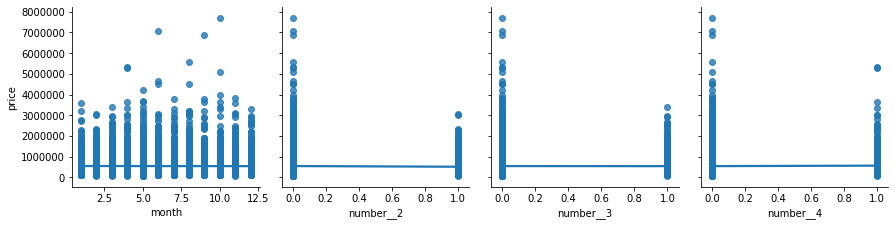

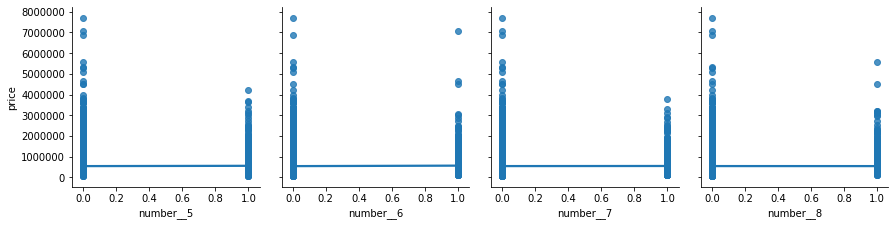

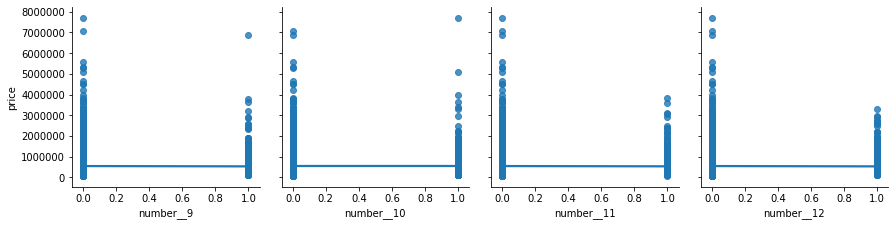

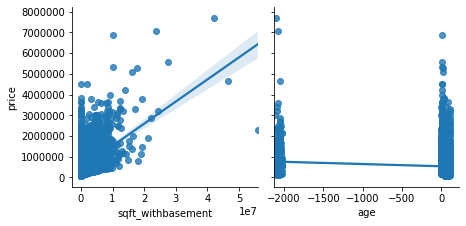

In [28]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)
    
    

In [5]:
# import folium
# manhattan_map = folium.Map(location=[40.7589, -73.9851], zoom_start=11)
# marker = folium.CircleMarker(location = [40.7589, -73.9851], radius=10)
# marker.add_to(manhattan_map)

In [6]:
# latandlon = list(zip(list(df['lat']),list(df['long'])))
# for i,v in latandlon:
#     print(i,v)
#     marker = folium.CircleMarker(location = [i, v], radius=10)
#     marker.add_to(manhattan_map)

In [7]:
# manhattan_map

## Step 3: Clean up any issues with the data like extreme values.  

remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout dataset, and you can't just delete those rows and not have a prediction for it. 

In [8]:
df = df[df['bedrooms']<10]
df = df[df['sqft_lot']<1500000]
df = df[df['sqft_lot15']<500000]

## Step 4: Generate new features that you think could be important

After doing this, you will want to go back to steps 2 and 3 to investigates these new features

In [9]:
df['year'] = df['date'].apply(lambda x: int(x[0:4]))
df['month'] = df['date'].apply(lambda x: int(x[4:6]))
dummies = pd.get_dummies(df['month'])

In [10]:
df['date'] = df['date'].apply(lambda x: x.strip('T000000'))
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [11]:
# your code here
df = pd.concat([df, pd.get_dummies(df['month'],drop_first = True,prefix = 'number_')], 1)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [12]:
#your code here
df['sqft_withbasement'] = df["sqft_basement"]*df['sqft_living']
df['yr_renovated'].value_counts()

0       16557
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column

In [13]:
conditions=[
    df.yr_renovated==0,
    df.yr_renovated!=0,
]
choises=[
    2020-df.yr_built,
    (df['yr_built'] - df['yr_renovated']) - 2020
]
df['age']=np.select(conditions,choises)

### Non-linear transformations

In [35]:
features = [str(x) for x in list(df.columns)[2:]]
featurelist='+'.join(features)
featurelist

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+year+month+number__2+number__3+number__4+number__5+number__6+number__7+number__8+number__9+number__10+number__11+number__12+sqft_withbasement+age'

In [31]:
line = ols(data=df,formula= 'price~bedrooms+bathrooms+sqft_living+sqft_lot+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+year+month+number__2+number__3+number__4+number__5+number__6+number__7+number__8+number__9+number__10+number__11+number__12+sqft_withbasement+age').fit()
line.summary()           
           

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     1470.
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:02:58   Log-Likelihood:            -2.3529e+05
No. Observations:               17282   AIC:                         4.706e+05
Df Residuals:                   17251   BIC:                         4.709e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.276e+08   2.09e+07     -6.104      0.000   -1.69e+08   -8.67e+07
bedrooms          -3.073e+04   2188.956    -14.038      0.000    -3.5e+04   -2.64e+04
bathrooms          4.978e+04   3478.036     14.313      0.000     4.3e+04    5.66e+04
sqft_living          15.1536      3.963      3.824      0.000       7.385      22.922
sqft_lot              0.0909      0.053      1.713      0.087      -0.013       0.195
waterfront         5.733e+05   1.87e+04     30.714      0.000    5.37e+05     6.1e+05
view               4.518e+04   2344.525     19.269      0.000    4.06e+04    4.98e+04
condition          3.002e+04   2584.964     11.614      0.000     2.5e+04    3.51e+04
grade               9.92e+04   2374.294     41.779      0.000    9.45e+04    1.04e+05
sqft_above          125.7489      2.775     45.318      0.000     120.310     131.188
sqft_basement      -111.5385      5.326    -20.944      0.000    -121.977    -101.100
yr_built          -1831.9909    169.660    -10.798      0.000   -2164.542   -1499.440
yr_renovated        893.7988    178.453      5.009      0.000     544.012    1243.585
zipcode            -510.0336     36.128    -14.117      0.000    -580.848    -439.219
lat                6.075e+05   1.18e+04     51.511      0.000    5.84e+05    6.31e+05
long              -2.207e+05   1.44e+04    -15.370      0.000   -2.49e+05   -1.93e+05
sqft_living15        35.6262      3.815      9.339      0.000      28.149      43.103
sqft_lot15           -0.3492      0.082     -4.255      0.000      -0.510      -0.188
year               6.199e+04   1.03e+04      6.033      0.000    4.19e+04    8.21e+04
month             -2.442e+05   4.01e+04     -6.094      0.000   -3.23e+05   -1.66e+05
number__2          2.527e+05    4.1e+04      6.159      0.000    1.72e+05    3.33e+05
number__3          5.231e+05   8.05e+04      6.501      0.000    3.65e+05    6.81e+05
number__4          7.717e+05    1.2e+05      6.411      0.000    5.36e+05    1.01e+06
number__5          1.031e+06   1.68e+05      6.140      0.000    7.02e+05    1.36e+06
number__6          1.287e+06   2.11e+05      6.114      0.000    8.74e+05     1.7e+06
number__7          1.525e+06   2.51e+05      6.084      0.000    1.03e+06    2.02e+06
number__8          1.777e+06   2.91e+05      6.114      0.000    1.21e+06    2.35e+06
number__9          2.008e+06   3.31e+05      6.073      0.000    1.36e+06    2.66e+06
number__10         2.261e+06   3.71e+05      6.097      0.000    1.53e+06    2.99e+06
number__11         2.503e+06   4.11e+05      6.093      0.000     1.7e+06    3.31e+06
number__12         2.745e+06   4.51e+05      6.087      0.000    1.86e+06    3.63e+06
sqft_withbasement     0.0707      0.002     32.685      0.000       0.066       0.075
age                 810.8808    165.325      4.905      0.000     486.827

### 4.4) Create a polynomial feature for two of your continuous variables

In [16]:
# your code here

#df['budget^2'] = df['budget']**2

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable) 

In [17]:
# your code here
#done
#df['budget_R'] = df['budget']*df['R']

## Step 5: Train Test Split

If you plan on doing any sclaing of your data, make sure it is doen at the apporpriate time. 

In [36]:
df_features = df[features]
target = df['price']

In [37]:
lm = LinearRegression()
lm = lm.fit(df_features, target)

print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-127889976.03327525
[-3.07286040e+04  4.97777158e+04  1.48414848e+01  9.08866240e-02
  1.92124649e+01  5.73278785e+05  4.51756292e+04  3.00215313e+04
  9.91940788e+04  1.26058093e+02 -1.11217225e+02 -1.83200368e+03
  8.93879455e+02 -5.10051198e+02  6.07459302e+05 -2.20715052e+05
  3.56281342e+01 -3.49179337e-01  6.19940059e+04  7.52600408e+03
  9.25086477e+02  1.96269079e+04  1.64305349e+04  2.34843222e+04
  2.83692004e+04  1.41946670e+04  1.47292144e+04 -5.74294483e+03
 -5.13458835e+03 -1.42548016e+04 -2.46634024e+04  7.06730332e-02
  8.10956497e+02]
R^2:  0.7187790261623632


### 5.1) Perform a train test split of the data.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13825, 33) Target:  (13825,)
Training set - Features:  (3457, 33) Target:  (3457,)


### 5.2) Fit your scaler to training the data.

In [45]:
#your code here 
scaler = StandardScaler()
scaler.fit(X_train)

### 5.3) Transform the testing set with the scaler.

In [46]:
#your code here 
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

### 5.4) Fit the model to the training data.

In [47]:
#your code here
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 199741.21167838725


### 5.5) Use the model to predict on the training set and the test set.

In [48]:
#your code here
y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [49]:
#your code here 
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 191320.32223149197
Training:  199741 vs. Testing:  191320


### 5.7) Determine if your model is overfit.

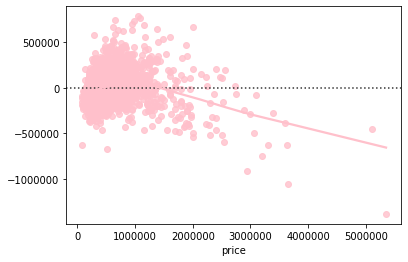

In [53]:
#your code here 
sns.residplot( y_test, y_test_pred,lowess=True, color="pink")


## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [25]:
# your code here

### 6.2) After removing the features, rerun steps 5 and see if you r new model performs better than the old model.

In [26]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall

## Step 8:  Refit your best model to the entire dataset

## Step 9: Save your final model using pickle

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/